## 1. Loading dataset
The dataset utilzied for this example can be downloaded from [http://deeplearning.net/data/mnist/mnist.pkl.gz](http://deeplearning.net/data/mnist/mnist.pkl.gz) and consist of a subset (20k examples) of the famous [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). 

In [1]:
import gzip
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [2]:
# As 'mnist.pkl.gz' was created in Python2, 'latin1' encoding is needed to loaded in Python3
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

The dataset contains 70K examples divided as: 50k for training, 10k for validation and 10k for testing.
Each example is a 28x28 pixel grayimages containing a digit. Some examples of the database:

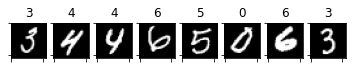

In [3]:
# Plot random examples
examples = np.random.randint(10000, size=8)
n_examples = len(examples)
plt.figure()
for ix_example in range(n_examples):
    tmp = np.reshape(train_set[0][examples[ix_example],:], [28,28])
    ax = plt.subplot(1,n_examples, ix_example + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title(str(train_set[1][examples[ix_example]]))
    plt.imshow(tmp, cmap='gray')

For sake of time, the MLP is trained with the validation set (10K examples); testing is performed with the test set (10K examples)

In [4]:
# Training data
#train_X = valid_set[0]
#train_y = valid_set[1]  
train_X = train_set[0]
train_y = train_set[1]
print('Shape of training set: ' + str(train_X.shape))

# change y [1D] to Y [2D] sparse array coding class
n_examples = len(train_y)
labels = np.unique(train_y)
train_Y = np.zeros((n_examples, len(labels)))
for ix_label in range(len(labels)):
    # Find examples with with a Label = lables(ix_label)
    ix_tmp = np.where(train_y == labels[ix_label])[0]
    train_Y[ix_tmp, ix_label] = 1


# Test data
test_X = test_set[0]
test_y = test_set[1] 
print('Shape of test set: ' + str(test_X.shape))

# change y [1D] to Y [2D] sparse array coding class
n_examples = len(test_y)
labels = np.unique(test_y)
test_Y = np.zeros((n_examples, len(labels)))
for ix_label in range(len(labels)):
    # Find examples with with a Label = lables(ix_label)
    ix_tmp = np.where(test_y == labels[ix_label])[0]
    test_Y[ix_tmp, ix_label] = 1


Shape of training set: (50000, 784)
Shape of test set: (10000, 784)


## 2. Parameters of MLP
 * __Number of layers__ : 4 (input, hidden1, hidden2 output)
 * __Elements in layers__ : [784, 25, 10, 10]   
 * __Activation function__ : Rectified Linear function
 * __Regularization parameter__ : 1 

## 3. Creating MLP object 

In [5]:
# Creating the MLP object initialize the weights
mlp = MLPClassifier(hidden_layer_sizes=(784, 25, 10, 10), activation='relu', random_state=42)
mlp

MLPClassifier(hidden_layer_sizes=(784, 25, 10, 10), random_state=42)

## 4. Training MLP object

In [6]:
mlp.fit(train_X, train_Y)

MLPClassifier(hidden_layer_sizes=(784, 25, 10, 10), random_state=42)

## 5. Testing MLP

In [8]:
y_pred = mlp.predict(test_X)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(test_y, np.argmax(y_pred, axis=1)))
#support é o número de ocorrencias reais da classe no conjunto de dados especificado

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.95      0.96       892
           6       0.99      0.96      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.98      0.94      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

